In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
sale_counts_file = "Sale_Counts_2019.csv"
sale_prices_file = "Median_Sale_Prices_2019.csv"

In [3]:
counts_df = pd.read_csv(sale_counts_file)
prices_df = pd.read_csv(sale_prices_file)

In [4]:
merged_df = pd.merge(counts_df, prices_df, on=['RegionID'], how='inner', suffixes = ('_count', '_price'))
merged_df.head(10)

,RegionID,RegionName_count,StateCode_count,January_count,February_count,March_count,April_count,May_count,June_count,July_count,...,March_price,April_price,May_price,June_price,July_price,August_price,September_price,October_price,November_price,December_price
0,394865,"Minneapolis-St Paul, MN",MN,5206,5568,5680,5642,5296,5328,5520,...,263900,267900,266700,265300,265200,267300,270300,273500,275600,275800
1,394543,"Duluth, MN",MN,423,466,466,453,413,414,436,...,156000,160400,157900,154200,153700,150500,148800,150500,155900,157300
2,395030,"Rochester, MN",MN,359,356,359,329,321,338,348,...,216500,219000,215200,215800,212900,217300,217100,219300,216100,215100
3,395118,"St. Cloud, MN",MN,260,272,259,260,252,274,287,...,176800,176800,188100,184700,188200,187700,189600,189500,190500,187500
4,394823,"Mankato, MN",MN,136,132,113,112,103,117,115,...,182400,190200,200600,201700,200700,196100,196400,197900,197600,195500
5,394410,"Brainerd, MN",MN,126,146,151,131,113,113,127,...,168800,170700,170700,170300,180100,184000,194600,199300,202900,198500
6,394586,"Faribault, MN",MN,94,88,81,78,80,83,94,...,218400,213200,213900,223500,229100,235200,234400,233500,236800,241900
7,394591,"Fergus Falls, MN",MN,62,93,105,91,63,62,71,...,202400,214000,177100,184900,178100,184400,194300,185200,196900,189000
8,395234,"Winona, MN",MN,65,77,81,76,65,58,62,...,161600,159200,157800,164000,165000,164100,151600,148100,152400,156500
9,395017,"Red Wing, MN",MN,51,64,59,58,45,51,61,...,188200,204200,202600,202600,206400,206900,203000,194900,198800,202200


In [5]:
counts_df.dropna(how='any')

,RegionID,RegionName,StateCode,January,February,March,April,May,June,July,August,September,October,November,December
0,394865,"Minneapolis-St Paul, MN",MN,5206,5568,5680,5642,5296,5328,5520,5641,5720,5819,5667,5703
1,394543,"Duluth, MN",MN,423,466,466,453,413,414,436,432,430,418,418,432
2,395030,"Rochester, MN",MN,359,356,359,329,321,338,348,356,351,355,362,351
3,395118,"St. Cloud, MN",MN,260,272,259,260,252,274,287,285,270,268,267,287
4,394823,"Mankato, MN",MN,136,132,113,112,103,117,115,119,115,113,121,139
5,394410,"Brainerd, MN",MN,126,146,151,131,113,113,127,130,141,136,131,122
6,394586,"Faribault, MN",MN,94,88,81,78,80,83,94,91,97,89,87,88
7,394591,"Fergus Falls, MN",MN,62,93,105,91,63,62,71,75,69,73,65,68
8,395234,"Winona, MN",MN,65,77,81,76,65,58,62,64,68,71,67,66
9,395017,"Red Wing, MN",MN,51,64,59,58,45,51,61,68,68,69,66,67


In [6]:
prices_df.dropna(how='any')

,RegionID,RegionName,StateCode,January,February,March,April,May,June,July,August,September,October,November,December
0,394865,"Minneapolis-St Paul, MN",MN,253200,257200,263900,267900,266700,265300,265200,267300,270300,273500,275600,275800
1,394543,"Duluth, MN",MN,146000,153000,156000,160400,157900,154200,153700,150500,148800,150500,155900,157300
2,395030,"Rochester, MN",MN,203100,210600,216500,219000,215200,215800,212900,217300,217100,219300,216100,215100
3,395118,"St. Cloud, MN",MN,176500,169900,176800,176800,188100,184700,188200,187700,189600,189500,190500,187500
4,394823,"Mankato, MN",MN,174000,178500,182400,190200,200600,201700,200700,196100,196400,197900,197600,195500
5,394410,"Brainerd, MN",MN,175700,170600,168800,170700,170700,170300,180100,184000,194600,199300,202900,198500
6,394586,"Faribault, MN",MN,225700,223600,218400,213200,213900,223500,229100,235200,234400,233500,236800,241900
7,394591,"Fergus Falls, MN",MN,168200,206100,202400,214000,177100,184900,178100,184400,194300,185200,196900,189000
8,395234,"Winona, MN",MN,161400,167000,161600,159200,157800,164000,165000,164100,151600,148100,152400,156500
9,395017,"Red Wing, MN",MN,177900,182300,188200,204200,202600,202600,206400,206900,203000,194900,198800,202200


In [7]:
merged_df.dropna(how='any')

,RegionID,RegionName_count,StateCode_count,January_count,February_count,March_count,April_count,May_count,June_count,July_count,...,March_price,April_price,May_price,June_price,July_price,August_price,September_price,October_price,November_price,December_price
0,394865,"Minneapolis-St Paul, MN",MN,5206,5568,5680,5642,5296,5328,5520,...,263900,267900,266700,265300,265200,267300,270300,273500,275600,275800
1,394543,"Duluth, MN",MN,423,466,466,453,413,414,436,...,156000,160400,157900,154200,153700,150500,148800,150500,155900,157300
2,395030,"Rochester, MN",MN,359,356,359,329,321,338,348,...,216500,219000,215200,215800,212900,217300,217100,219300,216100,215100
3,395118,"St. Cloud, MN",MN,260,272,259,260,252,274,287,...,176800,176800,188100,184700,188200,187700,189600,189500,190500,187500
4,394823,"Mankato, MN",MN,136,132,113,112,103,117,115,...,182400,190200,200600,201700,200700,196100,196400,197900,197600,195500
5,394410,"Brainerd, MN",MN,126,146,151,131,113,113,127,...,168800,170700,170700,170300,180100,184000,194600,199300,202900,198500
6,394586,"Faribault, MN",MN,94,88,81,78,80,83,94,...,218400,213200,213900,223500,229100,235200,234400,233500,236800,241900
7,394591,"Fergus Falls, MN",MN,62,93,105,91,63,62,71,...,202400,214000,177100,184900,178100,184400,194300,185200,196900,189000
8,395234,"Winona, MN",MN,65,77,81,76,65,58,62,...,161600,159200,157800,164000,165000,164100,151600,148100,152400,156500
9,395017,"Red Wing, MN",MN,51,64,59,58,45,51,61,...,188200,204200,202600,202600,206400,206900,203000,194900,198800,202200


In [26]:
MN_df = counts_df.loc[(counts_df['StateCode'] == 'MN'),['January', 'February', 'March', 'April', 
                                                        'May', 'June', 'July', 'August', 'September', 
                                                        'October', 'November', 'December']]
total_counts = MN_df.sum()
months = total_counts.keys()

In [17]:
US_df = MN_df = counts_df.loc[(counts_df['StateCode'] == 'US'),['January', 'February', 'March', 'April', 
                                                        'May', 'June', 'July', 'August', 'September', 
                                                        'October', 'November', 'December']]
US_counts = US_df.sum()
US_months = US_counts.keys()

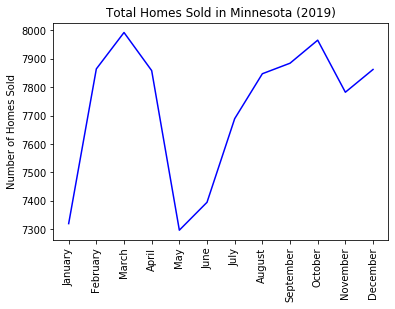

In [10]:
MN_counts = plt.plot(months, total_counts, color='blue',label='Minnesota Total Sales')

plt.xticks(months, rotation=90)
plt.title('Total Homes Sold in Minnesota (2019)')
plt.ylabel('Number of Homes Sold')
plt.show()

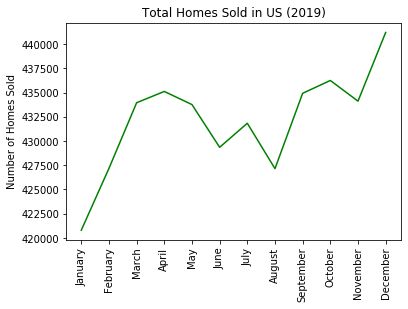

In [11]:
US_counts, = plt.plot(months, US_counts, color='green', label='US Total Sales')

plt.xticks(months, rotation=90)
plt.title('Total Homes Sold in US (2019)')
plt.ylabel('Number of Homes Sold')
plt.show()

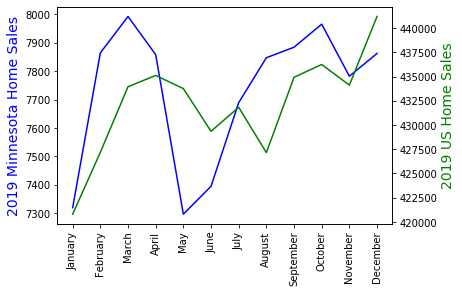

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(months, total_counts, color="blue")

# set y-axis label
ax.set_ylabel("2019 Minnesota Home Sales",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(US_months, US_counts ,color="green")
ax2.set_ylabel("2019 US Home Sales",color="green",fontsize=14)

ax.set_xticklabels(months, rotation=90)
plt.show()

# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

The correlations between both factors is 0.49.


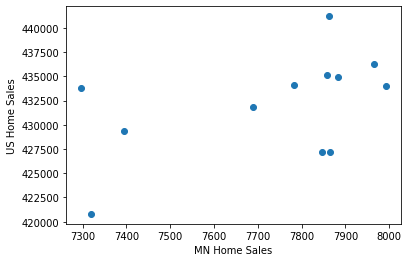

In [29]:
plt.scatter(total_counts, US_counts)
plt.xlabel('MN Home Sales')
plt.ylabel('US Home Sales')
correlation = st.pearsonr(total_counts, US_counts)
print(f'The correlations between MN and US home sales is {round(correlation[0],2)}.')
plt.show()

The r-squared is: 0.2426108653200641


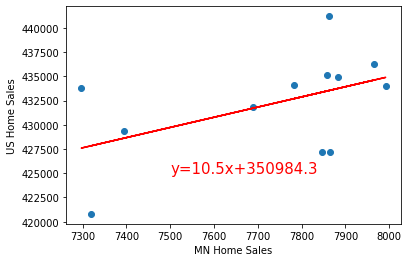

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_counts, US_counts)
regress_values = total_counts * slope + intercept
line_eq = "y=" +str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(total_counts, US_counts)
plt.plot(total_counts, regress_values, "r-")
plt.annotate(line_eq,(7500,425000),fontsize=15,color='red')
plt.xlabel('MN Home Sales')
plt.ylabel('US Home Sales')
print(f'The r-squared is: {rvalue**2}')
plt.show()